## Parte 4: dibris graph

In questa sezione andiamo ad analizzare il nostro grafo reale. 

Di questo grafo è importante l'analisi per capire le connessioni tra i vari ricercatori del dibris. In particolare si può andare a verificare se è presente un rapporto di collaborazione tra tutti i componenti oppure si sono sviluppati sottogruppi di ricerca distinti tra loro.

Questo è profondamente diverso dal grafo delle pubblicazioni-citazioni visto in classe: i nodi sono persone e gli archi sono le collaborazioni, per cui all'interno non sono neanche rappresentate le pubblicazioni.<br>
Per questo motivo ci aspettiamo che sia molto simile ad un small world graph, rispetto che ad un grafo di tipo scale free come quello di pubblicazioni-citazioni, con diverse componenti connesse molto piccole.

In [1]:
import networkx
graph = networkx.read_adjlist("../graphs/dibris_graph.txt")


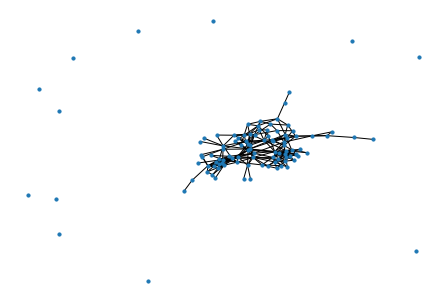

In [2]:
import matplotlib.pyplot as plt

networkx.draw(graph, with_labels=False, node_size=10)
plt.show()

In [3]:
print("Number of nodes: ", len(graph))
print("Number of edges: ", graph.number_of_edges())

Number of nodes:  103
Number of edges:  271


In [4]:
import collections

def average_degree(graph):
    """
    Calculate the average degree of the network
    :param graph: the networkx Graph() object
    :return: the average degree of the network
    """
    k = map(lambda d: d[1], graph.degree())
    return sum(list(k)) / graph.number_of_nodes()

print("Avarage degree: ", average_degree(graph))

Avarage degree:  5.262135922330097


Text(0.5, 0, 'Degree')

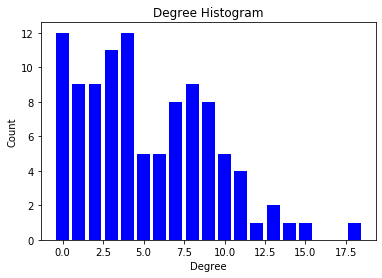

In [5]:
# Plot istrogramma degree

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")



In [6]:
print("Density: ", networkx.density(graph))


Density:  0.051589567865981345


In [7]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)

components = sorted(connected_component_subgraphs(graph), key=len, reverse=True)
print("There are ", len(components), " connected components")
print("Giant component size: ", len(components[0]))



There are  13  connected components
Giant component size:  91


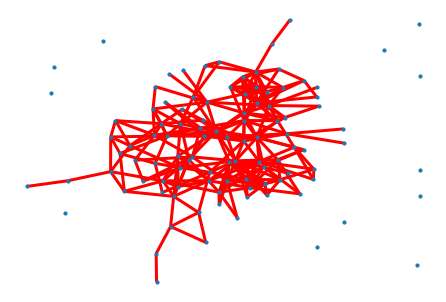

In [8]:
# Plot del grafo con le varie componenti connesse colorate con diversi colori
# identify largest connected component
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



pos = graphviz_layout(graph)

networkx.draw(graph, pos, with_labels=False, node_size=10)
# Getting largest connected component
graphcc = sorted(networkx.connected_components(graph), key=len, reverse=True)
graph0 = graph.subgraph(graphcc[0])
networkx.draw_networkx_edges(graph0, pos,
                        with_labels=False,
                        edge_color='r',
                        width=3.0
                        )
# show other connected components
for Gi in graphcc[1:]:
    if len(Gi) > 1:
        networkx.draw_networkx_edges(graph.subgraph(Gi), pos,
                                with_labels=False,
                                edge_color='r',
                                alpha=0.3,
                                width=2.0
                                )



Nelle celle seguenti andiamo quindi a misurare la distanza massima (diametro), minima (raggio) e media tra due punti qualsiasi del grafo.  
<br>In realtà non è possibile trovare queste misure per tutto il grafo se non è completamente connesso perché la il diametro e la media sarebbero uguali ad infinito.

In [9]:
print("Maximum eccentricity of giant component: ", networkx.diameter(components[0])) 

Maximum eccentricity of giant component:  9


In [10]:
print("Minimun eccentricity of giant component: ", networkx.radius(components[0])) 

Minimun eccentricity of giant component:  5


In [11]:
print("Average shortes path: ", networkx.average_shortest_path_length(components[0]))

Average shortes path:  3.3506715506715508


Adesso andiamo ad analizzare il clustering coefficient e la transitivity che ci da un'idea di quanto i nodi siano connessi tra di loro e la percentuale di cliques all'interno del grafo.

In [12]:
print("Average clustering coefficient: ", networkx.average_clustering(graph))

Average clustering coefficient:  0.41761631667399807


In [13]:
print("Transitivity: ", networkx.transitivity(graph))

Transitivity:  0.4007220216606498


### Considerazioni

Il grafo ci ha un po' sorpreso:  
- Guardando solo la degree distribution non è così netta la tipologia di grafo (tra scale free e small world). Bisogna andare a vedere il coefficiente di clustering (0.40) per poter affermare che si avvicina di piu alle caratteristiche di un grafo small-world.
- Non ci aspettavamo una componente connessa così grande, comprendente il 90% dei nodi. Questo significa che c'é un buon livello di collaborazione, e conseguente scambio di conoscienze, all'interno del dipartimento.


<br>Sono curiosi i dodici ricercatori con nessuna collaborazione interna al dibris, in parte dovuta al fatto che alcuni collaboratori non sono iscritti a Google Scholar, in parte a collaboratori stranieri entrati da poco a far parte del DIBRIS.

#### Nodi importanti

In questa sezione si andrà ad analizzare quale nodi sono più importanti di altri, in base a metriche descritte in precedenza.

Questi nodi saranno poi target di attacchi per il 2nd assignment.

In [14]:
print("10 nodi con degree maggiore")
dict(sorted(graph.degree, key=lambda x: x[1], reverse=True)[:10])

10 nodi con degree maggiore


{'9dRRzV0AAAAJ': 18,
 'riK7DscAAAAJ': 15,
 'mX7J33sAAAAJ': 14,
 'fU0A1uIAAAAJ': 13,
 'wZtu8FYAAAAJ': 13,
 '42uk7BMAAAAJ': 12,
 'B19jA14AAAAJ': 11,
 'hVOrSewAAAAJ': 11,
 '7i3HX4wAAAAJ': 11,
 'sm7utHwAAAAJ': 11}

In [15]:
import operator

print("10 nodi con maggiore closeness")
dict(sorted(networkx.closeness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore closeness


{'9dRRzV0AAAAJ': 0.38549400342661333,
 'FmYjiNAAAAAJ': 0.37815126050420167,
 'riK7DscAAAAJ': 0.3659528327460016,
 'sm7utHwAAAAJ': 0.3577106518282989,
 'fU0A1uIAAAAJ': 0.3393665158371041,
 'Q5k0Nr0AAAAJ': 0.33226679793256214,
 '7i3HX4wAAAAJ': 0.326797385620915,
 'Rlc6k70AAAAJ': 0.32412965186074433,
 'tIongz8AAAAJ': 0.32412965186074433,
 'JRxJkaMAAAAJ': 0.32281205164992827}

In [16]:
print("10 nodi con maggiore betweenness")
dict(sorted(networkx.betweenness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore betweenness


{'9dRRzV0AAAAJ': 0.15676801136191093,
 'FmYjiNAAAAAJ': 0.14542792997009277,
 'riK7DscAAAAJ': 0.10629519956247249,
 'mX7J33sAAAAJ': 0.07815565321931853,
 'sm7utHwAAAAJ': 0.06851013366476093,
 'QEGbLC0AAAAJ': 0.06412712488107172,
 'tIongz8AAAAJ': 0.06255271134796711,
 'wZtu8FYAAAAJ': 0.060611592345311,
 '7nlRez0AAAAJ': 0.058327117187047285,
 'fU0A1uIAAAAJ': 0.05247444703187076}

In [17]:
print("10 nodi con maggiore clustering coefficient")
dict(sorted(networkx.clustering(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore clustering coefficient


{'nMzsTbsAAAAJ': 1.0,
 'd69EGpEAAAAJ': 1.0,
 'ky3gHmYAAAAJ': 1.0,
 'aPSLBVUAAAAJ': 1.0,
 '9epB7x0AAAAJ': 1.0,
 'cFU6TRwAAAAJ': 1.0,
 'zMisBHkAAAAJ': 1.0,
 'dAZOMB8AAAAJ': 1.0,
 '9Nq_lpsAAAAJ': 1.0,
 'qVe_haIAAAAJ': 1.0}

### Considerazioni

Il nodo con maggiore degree è 9dRRzV0AAAAJ, che corrisponde a Mastrogiovanni Fulvio. 